<a href="https://colab.research.google.com/github/DomenicoArmillotta/AmazonScraper_with_TelegramChannelAlert/blob/main/Symbolic_project_Hybrid_NA_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#library
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.utils as nn_utils
import numpy as np


In [6]:
#input
# Dati di input standard
data = np.array([[0, 2.5584],
                 [0.5000, 2.6882],
                 [1.0000, 2.9627],
                 [1.5000, 3.2608],
                 [2.0000, 3.6235],
                 [2.5000, 3.9376],
                 [3.0000, 4.0383],
                 [3.5000, 4.1570],
                 [4.0000, 4.8498],
                 [4.5000, 4.6561],
                 [5.0000, 4.5119],
                 [5.5000, 4.8346],
                 [6.0000, 5.6039],
                 [6.5000, 5.5890],
                 [7.0000, 6.1914],
                 [7.5000, 5.8966],
                 [8.0000, 6.3866],
                 [8.5000, 6.6909],
                 [9.0000, 6.5224],
                 [9.5000, 7.1803],
                 [10.0000, 7.2537]])

# Dati di input per na  
#terza colonna è il target del primo infinitesimo
data_na = np.array([[0, 2.5584 , 0.2322],
                 [0.5000, 2.6882 , 0.7121],
                 [1.0000, 2.9627 , 0.9321],
                 [1.5000, 3.2608 , 1.0534],
                 [2.0000, 3.6235 , 1.3290],
                 [2.5000, 3.9376 , 1.5928],
                 [3.0000, 4.0383 , 1.8765],
                 [3.5000, 4.1570 , 1.9888],
                 [4.0000, 4.8498 , 2.4822],
                 [4.5000, 4.6561 , 2.9987],
                 [5.0000, 4.5119 , 3.4312],
                 [5.5000, 4.8346 , 3.7816],
                 [6.0000, 5.6039 , 3.9817],
                 [6.5000, 5.5890 , 4.3171],
                 [7.0000, 6.1914 , 4.6765],
                 [7.5000, 5.8966 , 5.0811],
                 [8.0000, 6.3866 , 5.4567],
                 [8.5000, 6.6909 , 6.0122],
                 [9.0000, 6.5224 , 6.4543],
                 [9.5000, 7.1803 , 6.9876],
                 [10.0000, 7.2537 , 7.3242]])

x = data[:, 0]
y = data[:, 1]
# y2 = data[:,2]
l = len(x)


#Standard Linear Regression

In [34]:
# Preparazione dei dati
x_train = torch.tensor(data[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data[:, 1], dtype=torch.float32).unsqueeze(1)

In [35]:

# Definizione della rete neurale
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 1)  # Output layer con 1 neurone

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Creazione della rete neurale
net = NeuralNet()



In [36]:
# Definizione di funzione di perdita e ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Addestramento della rete neurale
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Azzeramento dei gradienti
    outputs = net(x_train)  # Calcolo delle predizioni
    loss = criterion(outputs, y_train)  # Calcolo della perdita
    loss.backward()  # Calcolo dei gradienti
    optimizer.step()  # Aggiornamento dei pesi

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 100/1000, Loss: 0.0978
Epoch 200/1000, Loss: 0.0416
Epoch 300/1000, Loss: 0.0403
Epoch 400/1000, Loss: 0.0399
Epoch 500/1000, Loss: 0.0395
Epoch 600/1000, Loss: 0.0392
Epoch 700/1000, Loss: 0.0390
Epoch 800/1000, Loss: 0.0389
Epoch 900/1000, Loss: 0.0387
Epoch 1000/1000, Loss: 0.0386


In [38]:
# Valutazione della rete neurale
net.eval()
with torch.no_grad():
    predicted = net(x_train)

# Stampa dei risultati
print(f'Predicted:\n{predicted.squeeze().numpy()}')
print(f'Ground Truth:\n{y_train.squeeze().numpy()}')

Predicted:
[2.5509129 2.797182  3.042615  3.2878647 3.522109  3.755981  3.9898534
 4.223726  4.457598  4.6914706 4.9253426 5.1592155 5.393087  5.62696
 5.860832  6.0947037 6.3285766 6.562449  6.7964106 7.036259  7.2761073]
Ground Truth:
[2.5584 2.6882 2.9627 3.2608 3.6235 3.9376 4.0383 4.157  4.8498 4.6561
 4.5119 4.8346 5.6039 5.589  6.1914 5.8966 6.3866 6.6909 6.5224 7.1803
 7.2537]


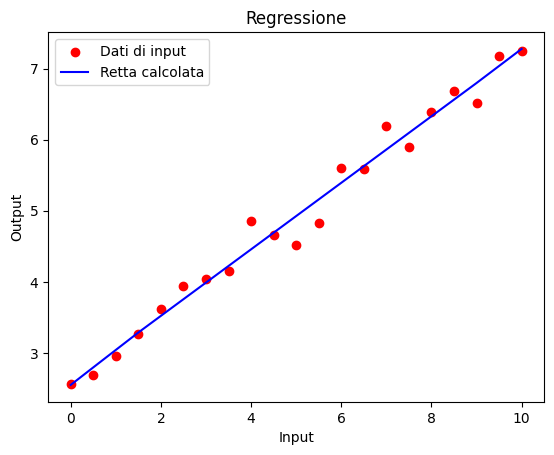

In [39]:
import matplotlib.pyplot as plt

# Tracciamento del plot
plt.scatter(data[:, 0], data[:, 1], color='red', label='Dati di input')
plt.plot(x_train.numpy(), predicted.numpy(), color='blue', label='Retta calcolata')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Regressione')
plt.legend()
plt.show()


In [ ]:
# Salva l'immagine del grafico della rete neurale con i pesi
dummy_input = torch.randn(1, 1)
output = net(dummy_input)
dot = make_dot(output, params=dict(net.named_parameters()))
dot.format = 'png'
dot.render('/content/drive/MyDrive/symbolic_custom_layer/network_graph')


'/content/drive/MyDrive/symbolic_custom_layer/network_graph.png'

TypeError: ignored

#NA LINEAR REGRESSION  --> 1 prova da correggere

ERRORI : 
loss troppo alta , cose provate : 


*   modifica inizializzazzione weight 1 
*   numero neuroni hidden
*   aumentato # epoch
*   diminuito lr



In [64]:
# Preparazione dei dati
x_train = torch.tensor(data_na[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na[:, 1], dtype=torch.float32).unsqueeze(1) #parte standard (1 problema)
y2_train = torch.tensor(data_na[:, 2], dtype=torch.float32).unsqueeze(1) #parte infinitesima (2 problema)

In [65]:
#custom layer
#batch size = 1
#input size = 10 se il mio hidden layer ha 10 neuroni
import torch.nn.init as init

class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size , monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        #self.weight1 = nn.Parameter(torch.randn(1, input_size))
        self.weight1 = nn.Parameter(torch.empty(1, input_size))
        self.weight2 = nn.Parameter(torch.randn(1, input_size))
        self.bias = nn.Parameter(torch.randn(1))
        self.monosemio = monosemio
        init.xavier_uniform_(self.weight1)

    def forward(self, x):
        output = x[:, 0].unsqueeze(1) * self.weight1 + x[:, 1].unsqueeze(1) * self.weight2 + self.bias
        #print("Forward output:", output)  # Stampa il valore di output
        return output


    def custom_backward(self, grad_output):
        if self.monosemio == 1:
            grad_input = torch.matmul(grad_output, self.weight1.t())
            grad_weight = torch.matmul(x.t(), grad_output)
            self.weight1.grad = grad_weight
            self.weight2.grad = None
            print("Grad weight1:", grad_weight)
            print("ciao")
        elif self.monosemio == 2:
            grad_input = torch.matmul(grad_output, self.weight2.t())
            grad_weight = torch.matmul(x.t(), grad_output)
            self.weight1.grad = None
            self.weight2.grad = grad_weight
            print("Grad weight2:", grad_weight)
            print("ciao2")
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")

        grad_bias = grad_output.mean(dim=0)
        self.bias.grad = grad_bias
        print("ciao3")

        print("Custom backward - Grad input:", grad_input)  # Stampa il gradiente di input
        print("Custom backward - Grad weight1:", self.weight1.grad)  # Stampa il gradiente di weight1
        print("Custom backward - Grad weight2:", self.weight2.grad)  # Stampa il gradiente di weight2
        print("Custom backward - Grad bias:", self.bias.grad)  # Stampa il gradiente del bias

        return grad_input

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio

Ultimo layer NA

In [66]:
#definizione della dnn con il layer custom
class NeuralNet(nn.Module):
    def __init__(self , monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 64)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(64, monosemio)  # Custom layer come output layer


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        #print("Forward output:", x)  # Stampa il valore di output
        return x


    def backward(self, loss):
        loss.backward()  # Esegue la backward sulla loss
        #print("Backward - Loss:", loss)  # Stampa il valore della loss
        self.custom_layer.custom_backward(loss.grad_fn)
        print('AAAAAAAAAAAAAAAAAAAAAAA')



# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)


In [67]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn

class CustomMSELoss(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELoss, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target , target1):
        if self.monosemio == 1:
            #target parte intera
            loss = torch.mean(torch.pow((input[:, 0] - target), 2))  # Considera solo il valore associato al weight1
            #print(loss)
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input[:, 1] - target1), 2))  # Considera solo il valore associato al weight2
        else : 
            raise ValueError("Il valore di monosemio deve essere 1, 2 o 3.")
        return loss


#criterio
#monosemio = 2  # Sostituisci con il valore desiderato (1, 2 o 3) in base a che monosemio voglio applicare la loss
#criterion = CustomMSELoss(monosemio)

#fare la loss
#loss = criterion(outputs, y_train)  # Calcolo della perdita con la custom loss

Monosemio: 1, Epoch 100/1000, Loss: 2.6481
Monosemio: 1, Epoch 200/1000, Loss: 2.0889
Monosemio: 1, Epoch 300/1000, Loss: 2.0622
Monosemio: 1, Epoch 400/1000, Loss: 2.0615
Monosemio: 1, Epoch 500/1000, Loss: 2.0615
Monosemio: 1, Epoch 600/1000, Loss: 2.0615
Monosemio: 1, Epoch 700/1000, Loss: 2.0615
Monosemio: 1, Epoch 800/1000, Loss: 2.0615
Monosemio: 1, Epoch 900/1000, Loss: 2.0615
Monosemio: 1, Epoch 1000/1000, Loss: 2.0615


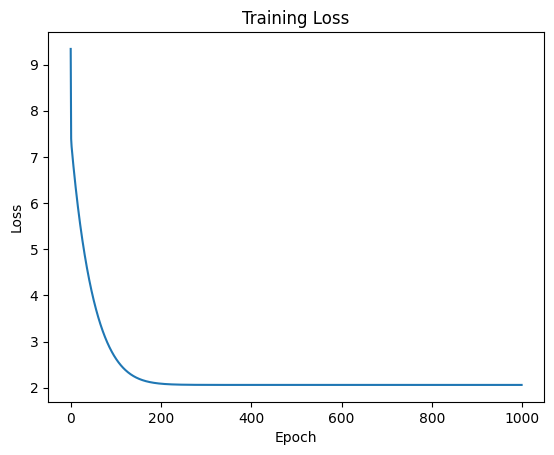

In [68]:
# Addestramento della rete neurale
num_epochs_per_monosemio = 1000
threshold = 1e-2
old_grad = None  # Inizializza old_grad come un tensore vuoto
optimizer = optim.SGD(net.parameters(), lr=0.01)
loss_values = []  # Lista per memorizzare i valori di loss


for monosemio in range(1, 2):
    #optimizer = optim.SGD(net.parameters(), lr=0.01)  # Reinizializzazione dell'ottimizzatore per ogni monosemio
    epoch = 0
    #se sto elaborando il monosemio = 1 --> loss sulla parte standard
    #se sto elaborando il monosemio = 2 --> loss sul primo infinitesimo
    criterion = CustomMSELoss(monosemio)

    optimizer_custom_layer_w1 = optim.SGD([net.custom_layer.weight1 , net.custom_layer.bias], lr=0.01)
    optimizer_custom_layer_w2 = optim.SGD([net.custom_layer.weight2 , net.custom_layer.bias], lr=0.01)
    optimizer_hidden_layer = optim.SGD([net.hidden.weight, net.hidden.bias], lr=0.01)


    # Elimina il grafo di autograd dai tensori coinvolti prima di partire con il monosemio 2
    if monosemio == 2 and epoch==0 :
      #old_grad = net.hidden.weight.grad.clone()
      net.custom_layer.weight1.detach_()
      net.custom_layer.bias.detach_()
      net.hidden.weight.detach_()
      net.hidden.bias.detach_()

    while epoch < num_epochs_per_monosemio and current_loss > threshold:
        
        if monosemio == 1:
            optimizer_custom_layer_w1.zero_grad()  # Azzeramento dei gradienti del custom layer
            optimizer_hidden_layer.zero_grad()  # Azzeramento dei gradienti del custom layer
            net.custom_layer.weight2.grad = None

            outputs = net(x_train)
            loss = criterion(outputs, y_train, y2_train)
            loss.backward()
            optimizer_custom_layer_w1.step()
            optimizer_hidden_layer.step()
            old_grad = net.hidden.weight.grad
            current_loss = loss.item()
            loss_values.append(current_loss)  # Aggiungi il valore di loss alla lista


        elif monosemio == 2:
            optimizer_custom_layer_w2.zero_grad()
            optimizer_hidden_layer.zero_grad()

            outputs = net(x_train)
            loss = criterion(outputs, y_train, y2_train)
            loss.backward(retain_graph=True)
            #print(old_grad)
            if old_grad is not None:
                new_grad = net.hidden.weight.grad
                projection = new_grad - torch.mm(new_grad, old_grad.t()) * old_grad / torch.mm(old_grad, old_grad.t())
                nn_utils.clip_grad_norm_(projection, max_norm=1.0)  # Normalizza i gradienti
                projection = projection.reshape(net.hidden.weight.grad.shape)
                net.hidden.weight.grad = projection

            optimizer_custom_layer_w2.step()
            optimizer_hidden_layer.step()

            #old_grad = -net.hidden.weight.grad

        else:
            raise ValueError("Il valore di monosemio deve essere compreso tra 1 e 2.")

        current_loss = loss.item()
        epoch += 1

        if epoch % 100 == 0:
            print(f'Monosemio: {monosemio}, Epoch {epoch}/{num_epochs_per_monosemio}, Loss: {current_loss:.4f}')

# Traccia il grafico della loss
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

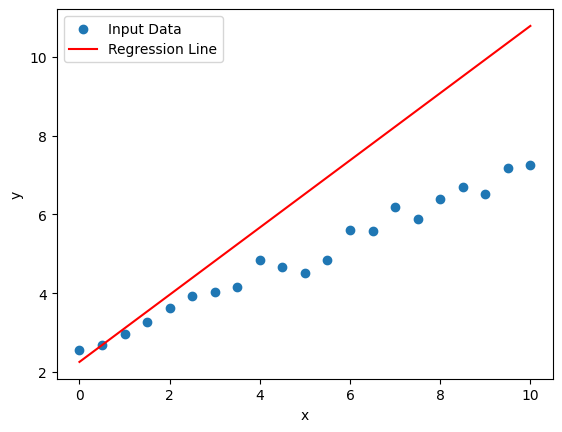

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()
bias = net.custom_layer.bias.detach().numpy()

# Punti di input per la regressione
x = data_na[:, 0]
y = data_na[:, 1]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight1[0][0] * x_plot + bias[0]

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


#TEST